Feature Sample:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B      LSTAT  
0     15.3  396.90   4.980000  
1     17.8  396.90   9.140000  
2     17.8  392.83   4.030000  
3     18.7  394.63   2.940000  
4     18.7  396.90  12.715432  

Target Sample:
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

Mean Squared Error: 25.02
R² Score: 0.66

Feature Coefficients:
         Coefficient
CRIM       -0.114140
ZN          0.029016
INDUS      -0.027133
CHAS        3.240673
NOX       -16.017543
RM          4.752410
AGE        -0.019520
DIS        -1.521593
RAD   

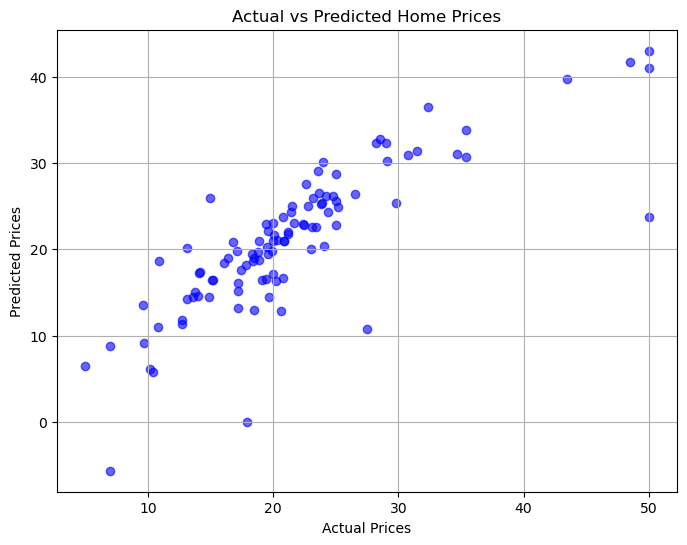

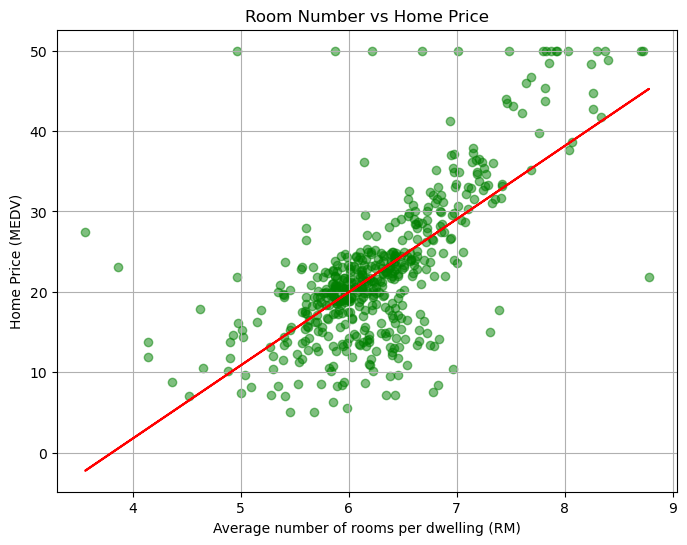

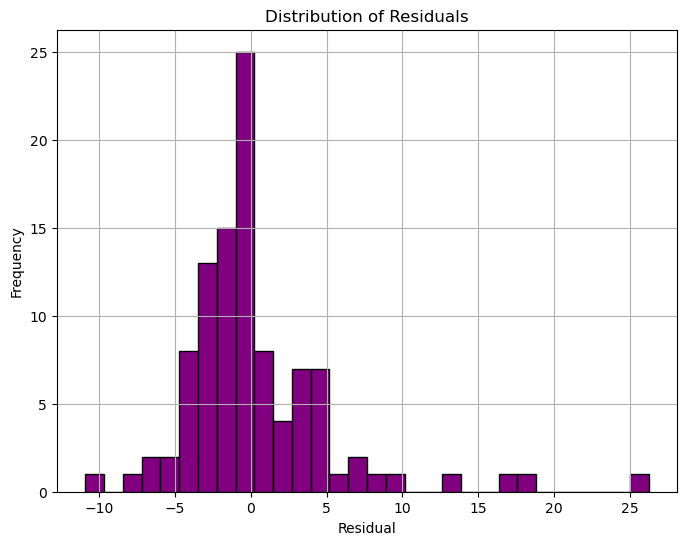

Predicted Price of the House: $30146.35


In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the Boston Housing dataset from CSV
boston = pd.read_csv("HousingData.csv")
# Check for missing values
# print("Missing values in dataset:\n", boston.isnull().sum())

# Separate features and target
X = boston.drop("MEDV", axis=1)
y = boston["MEDV"]

# # Impute missing values with mean

imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


# Display the first few rows
print("Feature Sample:")
print(X.head())
print("\nTarget Sample:")
print(y.head())

# Split the dataset into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Display feature coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coeff_df)

# Plot Actual vs Predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Home Prices")
plt.grid(True)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

# Plot RM vs MEDV with regression line
plt.figure(figsize=(8, 6))
plt.scatter(X["RM"], y, color="green", alpha=0.5)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Home Price (MEDV)")
plt.title("Room Number vs Home Price")
model_rm = LinearRegression().fit(X[["RM"]], y)
line = model_rm.predict(X[["RM"]])
plt.plot(X["RM"], line, color="red")  # Regression line
plt.grid(True)
plt.show()

# Plot distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Sample feature input (from row 0 of your feature sample)
# sample_house = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575,
#                           65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])

# Predict using trained model
predicted_price = model.predict(X.head())

# Display result
print(f"Predicted Price of the House: ${predicted_price[0]*1000:.2f}")
